## Observations and Insights
### Add your analysis here
1. Capomulin is an effective drug regimen to reduce tumor growth as it showed the least average tumor volume.
2. There is a strong correlation between mouse weight and tumor volume.
3. There is one mouse showed duplicated mouse ID and timpoint


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "right")

# Display the data table for preview
combined_df.head()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Check the number of mice.
print(f'The number of mice is:{len(combined_df["Mouse ID"].unique())}')

The number of mice is:249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_df = combined_df.loc[combined_df.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(f"duplicated mice are {dup_df}")


duplicated mice are ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#dup_df[["Mouse ID","Timepoint","Tumor Volume (mm3)",	"Metastatic Sites",	"Drug Regimen",	"Sex", "Age_months","Weight (g)"]]
dup_df1 = combined_df.loc[combined_df["Mouse ID"]=='g989',:]
dup_df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = combined_df.loc[combined_df["Mouse ID"]!= "g989",:]
cleaned_df = combined_df.loc[combined_df["Mouse ID"].isin(dup_df)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

In [8]:
median =cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
sem =cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
std =cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
var =cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean, "Median Tumor Volume":median, "Tumor Volume Variance": var, 
    "Tumor Volume Std. Dev.": std,"Tumor Volume Std. Err.":sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
agg_df= cleaned_df.groupby(["Drug Regimen"])
agg_df1= agg_df.agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
agg_df1
#agg_df1.head()
#agg_df1.loc[agg_df1.index =="Capomulin"]["Tumor Volume (mm3)"]["mean"]

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

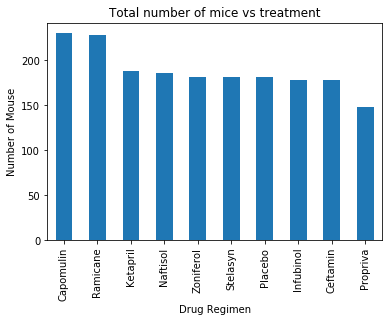

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#total_mice = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
#chart1 = total_mice.plot(kind = "bar")
cts = cleaned_df["Drug Regimen"].value_counts()
cts.plot(kind= "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")
plt.title("Total number of mice vs treatment")
plt.xticks(rotation =90)


plt.show()
plt.tight_layout()

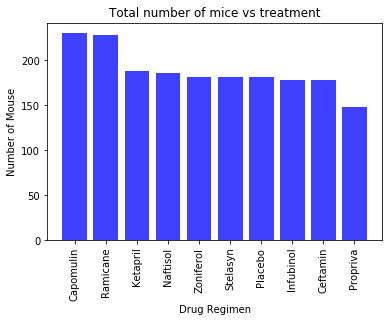

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
cts = cleaned_df['Drug Regimen'].value_counts()
plt.bar(cts.index.values, cts.values, facecolor="blue", alpha = 0.75, align = "center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mouse")
plt.title("Total number of mice vs treatment")
plt.show()


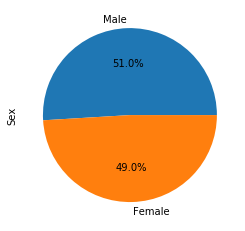

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#sex = cleaned_df.groupby(cleaned_df["Sex"]).count()["Mouse ID"]
#sex.plot(kind="pie")
sex1= cleaned_df["Sex"].value_counts()
sex1.plot(kind="pie", autopct ="%1.1f%%")
plt.show()


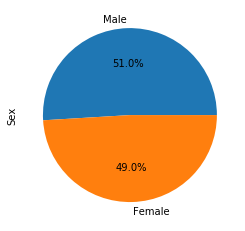

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex1= cleaned_df["Sex"].value_counts()
plt.pie(sex1.values, labels = sex1.index.values, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
max_tumor.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_tumor[["Mouse ID", "Timepoint"]].merge(cleaned_df, on =["Mouse ID", "Timepoint"], how = "left")
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [ ]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volume = merged_df.loc[merged_df["Drug Regimen"]== drug]["Tumor Volume (mm3)"]
    # add subset to tumor volume data list
    tumor_vol_list.append(drug_volume)
    #print(tumor_vol_list)
    # Determine outliers using upper and lower bounds
    for s in tumor_vol_list:
        s_quartiles = s.quantile([.25, .5, .75])
        s_lowerq =  s_quartiles[.25]
        s_upperq =  s_quartiles[.75]
        s_iqr = s_upperq - s_lowerq
        s_lower_bound = s_lowerq - (1.5* s_iqr)
        s_upper_bound = s_upperq + (1.5 * s_iqr)
        print(f"{drug} outliers :{drug_volume.loc[(s < s_lower_bound) | (s > s_upper_bound)]}")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

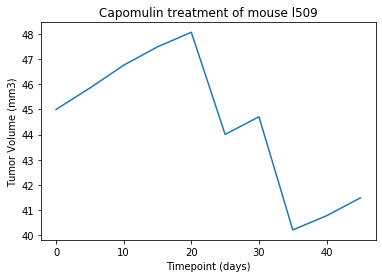

In [15]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin treatment of mouse l509')
plt.show()

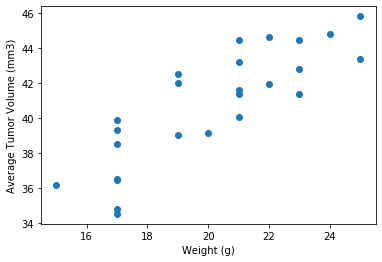

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


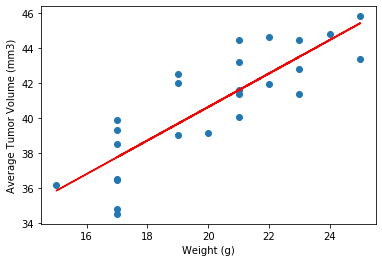

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*slope+intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()